##  What is Scikit-Learn (sklearn)

Is a python machine learnig library, help us build machine learning models and learn paterns within the data and then make predictions, also implement tools to help us to evaluate those predictions

- Built on Numpy and Matplotlib
- Has many in-built machine learning models 
- Methods to evaluate your machine learning models
- Very well-desingned API

### Scikit-Learn Workflow

Get data ready => Pick a model => Fit the model to the data (and make a prediction) => Evaluate the model => Improve through experimentation => Save and reload the trainded model

#### What we are going to cover: 

- End to end scikit-learn workflow
- Getting the data ready
- Choose the right estimator/argorithm for our problems
- Fit the model/algorith and use it to make predictions on our data
- Evaluating a model
- Improve a model
- Save and load a trained model
- Putting it all toguether


##### Where can you get help?
- Shift + Tab to read the docstring
- Stackoverflow 
- https://scikit-learn.org/0.21/documentation.html


# 0. An end to end ScikitLearn Workflow

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Getting the data ready to be used with machine learning

Three main things to do with the data: 
   - Slipt the data into features and labels (X and Y)
   - Filling or disregarding the missing values
   - Converting non-numerical values into numerical values (feaure encoding)

In [2]:
heart_disease = pd.read_csv("csv/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = heart_disease.drop("target", axis = 1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [4]:
Y = heart_disease["target"]
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [5]:
# Slipting data into training and test set
from sklearn.model_selection import train_test_split 

#Split arrays or matrices into random train and test subsets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [6]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((242, 13), (61, 13), (242,), (61,))

#### 1.1 Make sure is all numerical

In [7]:
car_sales = pd.read_csv("csv/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [8]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [9]:
# turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder(sparse = False)
transformer = ColumnTransformer([("one_hot",
                                  one_hot, 
                                  categorical_features)], 
                                  remainder = "passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [10]:
np.random.seed(42)

# Try to split the data into X and y
X = car_sales.drop("Price", axis = 1) 
y = car_sales["Price"]

# slipt into training and test
X_train, X_test, Y_train, Y_test = train_test_split(transformed_X, y, test_size = 0.2)

# build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test,Y_test) * 100

32.35867221569877

## 1.2  What if there are missing values?

   - Fill them with some value (imputing data).
   - Remove the samples with missing data altoguether.

In [11]:
# import the car sales with missing data
car_sales_missing_data = pd.read_csv("csv/car-sales-extended-missing-data.csv")
car_sales_missing_data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [12]:
car_sales_missing_data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [13]:
# create X and y
X = car_sales_missing_data.drop("Price", axis = 1)
y = car_sales_missing_data["Price"]

In [14]:
# try to convert to numbers
categorical_featues = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder(sparse = False)
transformer = ColumnTransformer([("one_hot",
                                  one_hot, 
                                  categorical_featues)], 
                                  remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [15]:
car_sales_missing_data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


#### Option 1: Fill missing data with pandas

In [16]:
# Fill the "Make" column 
car_sales_missing_data["Make"].fillna("missing", inplace = True)

# Fill the "Colour" column 
car_sales_missing_data["Colour"].fillna("missing", inplace = True)

# Fill the "Odometer (KM)" column 
car_sales_missing_data["Odometer (KM)"].fillna(car_sales_missing_data["Odometer (KM)"].mean(), inplace = True)

# Fill the "Colour" column 
car_sales_missing_data["Doors"].fillna(4, inplace = True)


In [17]:
car_sales_missing_data.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [18]:
# remove rows with missing Price value
car_sales_missing_data.dropna(inplace = True)
car_sales_missing_data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [19]:
# create X and y
X = car_sales_missing_data.drop("Price", axis = 1)
y = car_sales_missing_data["Price"]

In [20]:
# try to convert to numbers
categorical_featues = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder(sparse = False)
transformer = ColumnTransformer([("one_hot",
                                  one_hot, 
                                  categorical_featues)], 
                                  remainder = "passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [21]:
car_sales_missing_data = pd.read_csv("csv/car-sales-extended-missing-data.csv")
car_sales_missing_data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [22]:
car_sales_missing_data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [23]:
# Drop the rows with no labels
car_sales_missing_data.dropna(subset = ["Price"], inplace = True)
car_sales_missing_data.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [24]:
# split into X and y
X = car_sales_missing_data.drop("Price", axis=1)
y = car_sales_missing_data["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [25]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical values with mean
categorical_imputer = SimpleImputer(strategy = "constant",fill_value = "missing")
door_imputer = SimpleImputer(strategy = "constant",fill_value = 4)
numerical_imputer = SimpleImputer(strategy = "mean")

# define columns
categorical_features = ["Make", "Colour"]
door_feature = ["Doors"]
numerical_feature = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
inputer = ColumnTransformer([
    ("categorical_imputer",categorical_imputer, categorical_features),
    ("door_imputer", door_imputer, door_feature),
    ("numerical_feauture", numerical_imputer, numerical_feature)
])

# Fill train and test datasets
filled_X_train = inputer.fit_transform(X_train)
filled_X_test = inputer.transform(X_test)

# Check filled X train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [26]:
# Converting the filled arrays into dataframes
car_sales_filled_X_train = pd.DataFrame(filled_X_train, columns = ["Make","Colour","Doors","Odometer (km)"])
car_sales_filled_X_test = pd.DataFrame(filled_X_test, columns = ["Make","Colour","Doors","Odometer (km)"])

In [27]:
# check missing data in filled x train datafrane
car_sales_filled_X_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (km)    0
dtype: int64

In [28]:
# check missing data in filled x test datafrane
car_sales_filled_X_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (km)    0
dtype: int64

In [29]:
# turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder(sparse = False)
transformer = ColumnTransformer([("one_hot",
                                  one_hot, 
                                  categorical_features)], 
                                  remainder = "passthrough")

transformed_X_train = transformer.fit_transform(car_sales_filled_X_train)
transformed_X_test = transformer.transform(car_sales_filled_X_test)

In [30]:
transformed_X_train,transformed_X_test

(array([[0.0, 1.0, 0.0, ..., 1.0, 0.0, 71934.0],
        [0.0, 0.0, 0.0, ..., 1.0, 0.0, 162665.0],
        [0.0, 1.0, 0.0, ..., 1.0, 0.0, 42844.0],
        ...,
        [0.0, 0.0, 0.0, ..., 1.0, 0.0, 196225.0],
        [0.0, 1.0, 0.0, ..., 1.0, 0.0, 133117.0],
        [0.0, 1.0, 0.0, ..., 1.0, 0.0, 150582.0]], dtype=object),
 array([[0.0, 0.0, 0.0, ..., 1.0, 0.0, 99761.0],
        [0.0, 0.0, 0.0, ..., 1.0, 0.0, 17975.0],
        [0.0, 1.0, 0.0, ..., 1.0, 0.0, 197664.0],
        ...,
        [0.0, 0.0, 0.0, ..., 1.0, 0.0, 108569.0],
        [1.0, 0.0, 0.0, ..., 0.0, 0.0, 201190.0],
        [0.0, 1.0, 0.0, ..., 1.0, 0.0, 61163.0]], dtype=object))

In [31]:
# Now that we don´t have missing values, lets fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(transformed_X_train, y_train)

# Evaluate the model on the test data
model.score(transformed_X_test, y_test)*100

21.2290433361191

## 2. Choosing the right estimator/argorithm for our problem

Scikit-learn uses estimator as another termm for machine learning model or algorith

- Classification: Predicting whether a sample is one thing or another 
- Regression: Predicting a number

#### 2.1 Picking a machine learning model for our regression problem

In [32]:
# import bostons housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [33]:
# turn boston into a dataframe
boston_df = pd.DataFrame(boston["data"], columns = boston['feature_names'])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [34]:
# how many samples do we have
len(boston_df)

506

In [35]:
# try the Ridge regression model
np.random.seed(42)
from sklearn.linear_model import Ridge

# Create the data
X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# split into test and train 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

# instance of Ridge
model = Ridge()
model.fit(X_train, Y_train)

# Evaluate the model on test data
model.score(X_test, Y_test)

0.6662221670168522

How do we improve this score? 
What if Ridge wans´t working 

In [36]:
# try random forest regressor
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# create the data 
X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# split into test and train 
#X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

# instance of RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100)
rfr.fit(X_train, Y_train)

# Evaluate the model on test data
rfr.score(X_test, Y_test)

0.8922527442109116

In [37]:
# check the ridge model
model.score(X_test, Y_test) 

0.6662221670168522

### 2.2 Choosing and estimator for a classification problem 

In [38]:
heart_disease = pd.read_csv("csv/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
# Try LinearSVC model
np.random.seed(42)
from sklearn.svm import LinearSVC

# create the data 
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# split into test and train 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

# instance of LinearSVC
clf = LinearSVC(max_iter = 1000)
clf.fit(X_train, Y_train)

# Evaluate the model on test data
clf.score(X_test, Y_test)

C:\Users\jluna\Desktop\sample_project\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [40]:
# Try RandomForestClassifier model
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier

# create the data 
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# split into test and train 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

# instance of RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

# Evaluate the model on test data
clf.score(X_test, Y_test)

0.8524590163934426

#### Tip:
   - If you have structurated data, use ensemble methods
   - If you have unstructurated data, use deep learning or transfer learning

## 3. Fit the model/algorith and use it to make predictions on our data

### 3.1 Fitting the model to the data

Names for:
 - X: features, feature data, data, input
 - y: labels, targets, target variables, output

In [41]:
# Try RandomForestClassifier model
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier

# create the data 
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# split into test and train 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)

# instance of RandomForestClassifier
clf = RandomForestClassifier()

## Fit the model to the data (Training the machine learning model)
clf.fit(X_train, Y_train)

# Evaluate the model on test data (use the patterns the model has learned)
clf.score(X_test, Y_test)

0.8524590163934426

In [42]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


## 3.2 Make predictions using a machine learning model

2 Main ways to make predictions:
  - `predict()`
  - `predict_proba()`

In [43]:
# use a train model to make predictions
#clf.predict(np.array([1,58,5,748,6,2])) # doesnt work 

In [44]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [45]:
clf.predict(X_test) # predictions

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [46]:
np.array([Y_test]) # truth labels

array([[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [47]:
# compare predictions with truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == Y_test)

0.8524590163934426

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_preds)

0.8524590163934426

Predictions with `predict_proba()`

In [49]:
# predict_proba returns probabilities of a classification label
clf.predict_proba(X_test)[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [50]:
# predict() on the same data
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

`predict()` also can be used on regression models

In [51]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# create the data
X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# instance of RandomForestRegressor and fit it to the data
model = RandomForestRegressor().fit(X_train, y_train)

# make predictions on test data
y_preds = model.predict(X_test)
y_preds

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639, 19.787, 19.541,  8.583, 21.85 , 19.531, 25.851,
       19.759,  8.22 , 45.109, 14.712, 24.548, 23.956, 14.548, 22.944,
       15.023, 14.643, 21.137, 14.153, 19.232, 20.666, 19.588, 23.254,
       33.01 , 20.461, 14.271, 15.889, 34.704, 19.154, 20.85 , 24.395,
       18.978, 29.84 , 45.302, 19.447, 22.234, 13.751, 15.511, 24.612,
       18.729, 28.235, 21.21 , 34.218, 17.271, 26.147, 45.279, 21.924,
       15.532, 32.412, 22.212, 20.453, 25.532, 34.326, 28.795, 18.951,
       27.145, 17.181, 13.534, 23.04 , 28.714, 15.802, 20.451, 27.87 ,
       10.193, 21.507, 22.383,  7.265, 20.089, 45.388, 10.88 , 13.053,
       21.322, 12.366, 20.233,  9.135, 20.052, 26.787, 15.277, 23.267,
       23.613, 17.699, 21.617,  7.921, 19.475, 18.807, 22.386, 19.836,
       38.714, 13.159, 12.476, 13.612, 20.205, 23.832])

In [52]:
# compare the predictions from the truth 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.136382352941176

In [53]:
np.mean(abs(np.array(y_test) - y_preds))

2.136382352941176

## 4. Evaluating a model

Three main ways to evaluate a Scikit-learn Model/Estimator

    1. Estimator `score()` method
    2. The `scoring()` parameter
    3. Problem specific metric functions
    


In [54]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

### 4.1 Evaluating with `score()` method

In [55]:
clf.score(X_train, y_train)

1.0

In [56]:
clf.score(X_test, y_test)

0.8524590163934426

##### The same but for regression

In [57]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# create the data
X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# instance of RandomForestRegressor and fit it to the data
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [58]:
model.score(X_test, y_test)

0.8654448653350507

## 4.2 Evaluate using the `scoring` parameter

In [59]:
np.random.seed(42)
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
clf.score(X_test, y_test)

0.8524590163934426

In [61]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

<img src="img\sklearn-cross-validation.png">

In [62]:
np.random.seed(42)

# single training and test split score 
clf_simple_score = clf.score(X_test, y_test)

# take the mean of 5 fold cross validation score
clf_cross_validation = np.mean(cross_val_score(clf, X, y, cv = 5))

# compare the two
clf_cross_validation, clf_simple_score

(0.8248087431693989, 0.8524590163934426)

In [63]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv = 5,scoring= None)
# scoring parameter of classifier = mean accuracy: clf.score()

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classsification model evaluation metrics
    1. Accuracy
    2. Area under ROC curve
    3. Confution matrix
    4. Classification report

### Acuracy

In [64]:
np.random.seed(42)
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()

cross_validation_score = cross_val_score(clf, X, y)

In [65]:
np.mean(cross_validation_score)

0.8215300546448088

In [66]:
print(f"Heart disease Classifier Accuracy: {np.mean(cross_validation_score)*100:.2f}%")

Heart disease Classifier Accuracy: 82.15%


### Area under ROC curve

**Area under the receiver operating characteristic curve (AUC/ROC)**

ROC curves are a comparison of a model´s true positive rate (tpr) versus a model´s false positive rate (fpr).
 - True positive = model predics 1 when the truth label is 1
 - False positive = model predicts 1 when the truth label is 0
 - True negative = model predicts 0 when the truth label is 0
 - False negative = model predicts 0 when the truth label is 1

In [67]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# make predictions with predict_proba()
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.94, 0.06],
       [0.42, 0.58],
       [0.51, 0.49],
       [0.89, 0.11],
       [0.23, 0.77],
       [0.16, 0.84],
       [0.25, 0.75],
       [0.96, 0.04],
       [0.98, 0.02],
       [0.51, 0.49]])

In [68]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:5]

array([0.06, 0.58, 0.49, 0.11, 0.77])

In [69]:
y_probs_negative = y_probs[:,0]
y_probs_negative[:5]

array([0.94, 0.42, 0.51, 0.89, 0.23])

In [70]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
# false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03448276, 0.03448276,
       0.06896552, 0.06896552, 0.10344828, 0.10344828, 0.17241379,
       0.17241379, 0.17241379, 0.24137931, 0.24137931, 0.27586207,
       0.55172414, 0.68965517, 0.72413793, 0.72413793, 0.79310345,
       0.89655172, 0.96551724, 1.        ])

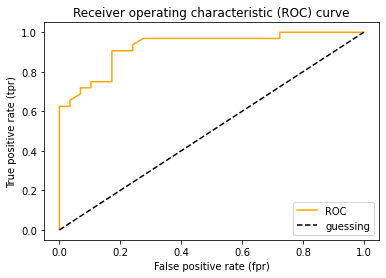

In [71]:
# function for ploting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the fpr and tpr of a model
    """
    # plot roc curve
    plt.plot(fpr, tpr, color = "orange", label = "ROC")
    # plot line with no predictive value (baseline)
    plt.plot([0,1], [0,1], color  = "black", linestyle = "--", label = "guessing")
    
    # customize
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver operating characteristic (ROC) curve")
    plt.legend()
    
plot_roc_curve(fpr, tpr)

In [72]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9267241379310345

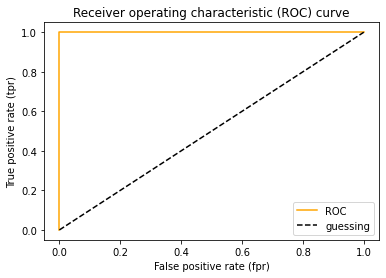

In [73]:
# Perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [74]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

### Confusion Matrix

**A confusion matrix is a quick way to predict the labels a model predicts and the actual labels it was suposed to predict.**
In essense, giving us an idea of where the model is getting confused

In [75]:
from sklearn.metrics import confusion_matrix
y_labels = clf.predict(X_test)

confusion_matrix(y_test, y_labels)

array([[24,  5],
       [ 5, 27]], dtype=int64)

In [76]:
# Visualize the confussion matrix with pd.crosstab()
pd.crosstab(y_test, y_labels, rownames = ["Actual label"], colnames = ["Predicted labels"])

Predicted labels,0,1
Actual label,,
0,24,5
1,5,27


<AxesSubplot:>

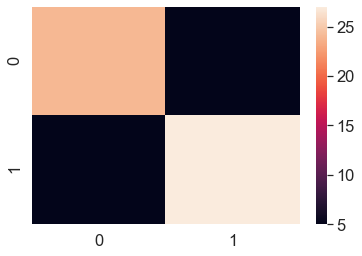

In [77]:
# make out confusion matrix more visual with seaborn´s heatmap
import seaborn as sns

# Set Font-size
sns.set(font_scale = 1.5)

# create a confusion matrix 
conf_mat = confusion_matrix(y_test, y_labels)

#

# plot it
sns.heatmap(conf_mat)

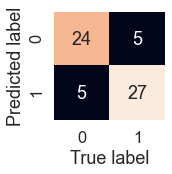

In [78]:
# Function to plot a confusion matrix
def plot_confusion_matrix(conf_mat):
    """
    Plot a confusion matrix using seaborn´s heatmap
    """
    fig, ax = plt.subplots(figsize = (2,2))
    ax = sns.heatmap(
        conf_mat,
        annot = True, # annotate the boxes with conf_map info
        cbar = False
    )
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    plt.show()

plot_confusion_matrix(conf_mat)

### Classification Report 

In [79]:
from sklearn.metrics import classification_report
y_preds = clf.predict(X_test)
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [80]:
# where this metrics and recall become valuable
disease_labels = np.zeros(10000)
disease_labels[0] = 1 # 1 positive case

disease_preds = np.zeros(10000)
report = classification_report(
    disease_labels,
    disease_preds,
    output_dict = True,
    zero_division = 0
)

classification_dataframe = pd.DataFrame(report)
classification_dataframe

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


- **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
- **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
- **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
- **Support** - The number of samples each metric was calculated on.
- **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
- **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
- **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

### 4.2.2 Regression model evaluation
- R^2 or coefficient of determination
- Mean absolute error (MAE)
- Mean squared error (MSE)



In [81]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [82]:
model.score(X_test, y_test)

0.8654448653350507

### R^2

Compares your model´s predictions to the mean of the targets. Values can range from negative infinity to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0, and if your model perfectly predicts a range of number, its R^2 would be 1

In [83]:
from sklearn.metrics import r2_score

# fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean[:10]

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529])

In [84]:
r2_score(y_test, y_test_mean) # almost 0

2.220446049250313e-16

In [85]:
r2_score(y_test, y_test) # perfect score

1.0

### Mean Abosolute Error (MAE)

Is the average of the absolute differences between predictions and actual values. Give us an idea of how wrong the model predictions are

In [86]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae

2.136382352941176

In [87]:
df = pd.DataFrame(data = {
    "Truth values": y_test,
    "Predicted Values": y_preds 
}) 
df["difference"] = abs(df["Truth values"] - df["Predicted Values"])
df

,Truth values,Predicted Values,difference
173,23.6,23.081,0.519
274,32.4,30.574,1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,4.741
436,9.6,12.476,2.876
411,17.2,13.612,3.588
86,22.5,20.205,2.295


### Mean Squared Error (MSE)

In [88]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [89]:
# MSE by hand
np.mean(np.square(df["difference"])) 

9.867437068627439

### 4.2.3 Using the cross validation´s scoring parameter 

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [91]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [92]:
# Cross validated accuracy 
print(f"The cross validated accuracy is: {np.mean(cv_acc)*100:.3f} %")

The cross validated accuracy is: 82.481 %


In [93]:
# precision
cv_precision = cross_val_score(clf, X, y, scoring = "precision")
print(f"The cross validated presicion is: {np.mean(cv_precision)*100:.3f} %")

The cross validated presicion is: 80.856 %


In [94]:
# recall
cv_recall = cross_val_score(clf, X, y, scoring = "recall")
print(f"The cross validated recall is: {np.mean(cv_recall)*100:.3f} %")

The cross validated recall is: 84.242 %


In [95]:
# f1
cv_f1 = cross_val_score(clf, X, y, scoring = "f1")
print(f"The cross validated f1 is: {np.mean(cv_f1)*100:.3f} %")

The cross validated f1 is: 84.148 %


**With our regression model...**

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = boston_df.drop("target", axis = 1)
y = boston_df["target"]

model = RandomForestRegressor()

In [97]:
# Default value is r2
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, scoring = None)
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [98]:
# r2
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, scoring = "r2")
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [99]:
# MAE
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, scoring = "neg_mean_absolute_error")
cv_mae

array([-2.11419608, -2.58716832, -3.33976238, -3.78563366, -3.32941584])

In [100]:
# MSE
np.random.seed(42)
cv_mse = cross_val_score(model, X, y, scoring = "neg_mean_squared_error")
cv_mse

array([ -7.86326927, -12.71243178, -20.29089194, -45.93287403,
       -19.50774726])

### 4.3 Scikit learn metric functions
#### Classification evaluating functions

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# make predictions
y_preds = clf.predict(X_test)

# evaluate the classifier
print("Classifier metrics on test set")
print(f"Accuraccy score: {accuracy_score(y_test, y_preds)*100:.3f}")
print(f"Presicion score: {precision_score(y_test, y_preds)*100:.3f}")
print(f"Recall score: {recall_score(y_test, y_preds)*100:.3f}")
print(f"F1 score: {f1_score(y_test, y_preds)*100:.3f}")

Classifier metrics on test set
Accuraccy score: 85.246
Presicion score: 84.848
Recall score: 87.500
F1 score: 86.154


#### Regression evaluating functions

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
np.random.seed(42)

X = boston_df.drop("target", axis = 1)
y = boston_df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# make predictions
y_preds = model.predict(X_test)

# evaluate the Regressor
print("Classifier metrics on test set")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"Mean absolute error: {mean_absolute_error(y_test, y_preds)}")
print(f"Mean squared error: {mean_squared_error(y_test, y_preds)}")

Classifier metrics on test set
R^2: 0.8654448653350507
Mean absolute error: 2.136382352941176
Mean squared error: 9.867437068627442


## 5. Improve a model

First predictions = baseline predictions.<br>
First model = baseline model. 

#### From data perspective:
 - Could we collect more data? (generally, more data is better)
 - Could we improve our data? 

#### From model perspective:
 - Is there a better model we could use? 
 - Could we improve the current model?

**Parameters:** Model find these patterns in data <br>
**Hyperparameters:** Settings on a model you can adjust to (pottentially) improve its ability to find patterns 

#### Three ways to adjust hyperparameters:
 - By hand
 - Randomly with RandomSearchCV
 - Exhaustively with GridSearchCV


<img src="img\sklearn-train-valid-test-annotated.png" >

In [103]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Find the hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let´s make 3 sets: training, validation, and test <br>

We´re going to try to adjust:
 - `max_depth`
 - `max_features`
 - `min_samples_leaf`
 - `min_samples_split`
 - `n_stimators`

In [104]:
# evaluation function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_preds(y_true, y_preds): 
    """
    Perform evaluating comparison on y_true labels vs y_pred labels on a classification model
    """
    
    accuraccy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds, zero_division = 0)
    f1 = f1_score(y_true, y_preds)
    
    print(f"Accuraccy: {accuraccy*100:.2f}")
    print(f"Precision: {precision*100:.2f}")
    print(f"Recall: {recall *100:.2f}")
    print(f"F1 Score: {f1 *100:.2f}")
    
    return {
        "accuraccy": round(accuraccy,2),
        "precision": round(precision, 2),
        "recall": round(recall,2),
        "f1 score": round(f1,2)
    }

In [105]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier

# shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X and y 
X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# split into train, test, and validation
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of the data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15 %

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuraccy: 82.22
Precision: 81.48
Recall: 88.00
F1 Score: 84.62


{'accuraccy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1 score': 0.85}

In [106]:
np.random.seed(42)
# create a second classifier with different hyperparameters
clf2 = RandomForestClassifier(
    n_estimators = 5000
)
clf2.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf2.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuraccy: 82.22
Precision: 81.48
Recall: 88.00
F1 Score: 84.62


{'accuraccy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1 score': 0.85}

In [107]:
np.random.seed(42)
# create a third classifier with different hyperparameters
clf3 = RandomForestClassifier(
    n_estimators = 150,
    max_depth=15
)
clf3.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf3.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuraccy: 80.00
Precision: 80.77
Recall: 84.00
F1 Score: 82.35


{'accuraccy': 0.8, 'precision': 0.81, 'recall': 0.84, 'f1 score': 0.82}

## 5.2 Hyperparameter tuning with RandomSearchCV

In [108]:
from sklearn.model_selection import RandomizedSearchCV

In [109]:

grid = {
    "max_depth":  [None, 5,10, 20, 30],
    "max_features": ["auto", "sqrt"] , 
    "min_samples_leaf" : [1, 2, 4] ,
    "min_samples_split" : [2,4,6],
    "n_estimators" : [10, 100, 200, 500, 1000, 1200],
}
np.random.seed(42)

# Split into X and y 
X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# instatiate the RandomForestClassifier
clf = RandomForestClassifier(n_jobs = -1)

# setup RandomizedSearchCV
rscv_clf = RandomizedSearchCV(
    estimator = clf, 
    param_distributions = grid, # hyperparameters to tune
    n_iter = 10, # number of models
    cv = 5,
    verbose = 2
) 

# fit the RandomizedSearchCV version of clf
rscv_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [110]:
rscv_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [111]:
# make predictions with the best hyperparameters
rs_y_preds = rscv_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuraccy: 81.97
Precision: 77.42
Recall: 85.71
F1 Score: 81.36


## 5.3 Hyperparameter tuning with GridSearchCV

In [112]:
grid_2 = {
    "max_depth":  [None, 5,10, 20, 30],
    "max_features": ["auto", "sqrt"] , 
    "min_samples_leaf" : [1, 2] ,
    "min_samples_split" : [6],
    "n_estimators" : [10, 100, 200],
}

In [113]:
from sklearn.model_selection import GridSearchCV, train_test_split
np.random.seed(42)

# Split into X and y 
X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# instatiate the RandomForestClassifier
clf = RandomForestClassifier(n_jobs = -1)

# setup RandomizedSearchCV
gscv_clf = RandomizedSearchCV(
    estimator = clf, 
    param_distributions = grid_2, # hyperparameters to tune
    cv = 5,
    verbose = 2
) 

# fit the RandomizedSearchCV version of clf
gscv_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [6],
                                        'n_estimators': [10, 100, 200]},
                   verbose=2)

In [114]:
gscv_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [115]:
# make predictions with the best hyperparameters
gs_y_preds = gscv_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuraccy: 81.97
Precision: 77.42
Recall: 85.71
F1 Score: 81.36


<AxesSubplot:>

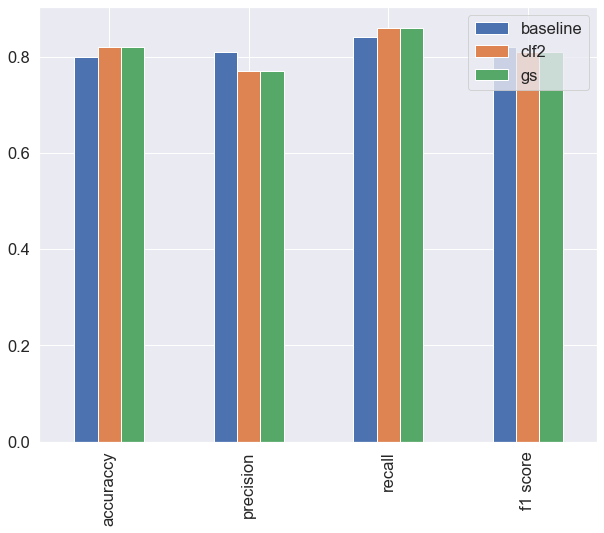

In [116]:
# compare our different model
compare_metrics = pd.DataFrame({"baseline":baseline_metrics, "clf2":rs_metrics, "gs":gs_metrics})
compare_metrics.plot.bar(figsize=(10,8))

## 6. Saving and loading a trained machine learning model

Two ways to save and load machine learning models:
 1. With python´s `pickle` module
 2. With `joblib`module
 
 ### Pickle

In [117]:
import pickle as pkl

# Save an existing model to file 
pkl.dump(gscv_clf, open("models/gs_random_forest_heart_disease.pkl", "wb"))

In [118]:
# Load a saved model 
loaded_model = pkl.load(open("models/gs_random_forest_heart_disease.pkl", "rb"))

In [119]:
# Make predictions on the loaded model
pkl_y_preds = loaded_model.predict(X_test)
evaluate_preds(y_test, pkl_y_preds)

Accuraccy: 80.33
Precision: 75.00
Recall: 85.71
F1 Score: 80.00


{'accuraccy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1 score': 0.8}

### Joblib

In [120]:
from joblib import dump, load

#save model to file
dump(gscv_clf, filename = "models/gs_random_forest_heart_disease_joblib.joblib")

['models/gs_random_forest_heart_disease_joblib.joblib']

In [121]:
# load a saved model
loaded_joblib = load(filename = "models/gs_random_forest_heart_disease_joblib.joblib")

In [122]:
# make and evaluate predictions 
joblib_preds = loaded_joblib.predict(X_test)
evaluate_preds(y_test, joblib_preds)

Accuraccy: 80.33
Precision: 75.00
Recall: 85.71
F1 Score: 80.00


{'accuraccy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1 score': 0.8}

## 7. Putting it all toguether 

### Steps we want to do
 - Fill missing data
 - Convert data to numbers
 - Build a model on the data

In [147]:
# preparing the data
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

import numpy as np
np.random.seed(42)

# import data and drop rows with missing labels
data = pd.read_csv("csv/car-sales-extended-missing-data.csv")
data.dropna(subset = ["Price"], inplace = True)

#  Define different features and transformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps = [ 
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 4))
])

numerical_feature = ["Odometer (KM)"]
numerical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'mean'))
])

# Setup preprocesing steps
preprocesor = ColumnTransformer(transformers = [
    ('categorical', categorical_transformer, categorical_features),
    ('door', door_transformer, door_feature),
    ('numerical', numerical_transformer, numerical_feature )
])

# create a preprocesing and modeling pipeline
model = Pipeline(steps = [
    ('preprocessor', preprocesor),
    ('model',RandomForestRegressor())
])

# Split data
X = data.drop("Price", axis = 1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# fit the model
model.fit(X_train, y_train)

# score the model
model.score(X_test, y_test)

0.22188417408787875

### Its also posible to use `GridSearchCV` or `RandomizedSearchCV` with out `Pipeline`

In [156]:
# use GridSearchCV with our regression pypeline
pipe_grid = {
    'preprocessor__numerical__imputer__strategy':['mean', 'median'],
    'model__n_estimators':[100,1000],
    'model__max_depth':[None,5],
    'model__max_features': ['auto'],
    'model__min_samples_split':[2,4]
}
gs_model = GridSearchCV(model, pipe_grid, verbose = 2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_f

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numerical__imputer__strategy=mean; total time=   1.7s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, pr

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                    

In [157]:
gs_model.score(X_test, y_test)

0.3339554263158365